# `numpy` (tableaux de données multi-dimensionnels) et `matplotlib` (visualisation en 2D et 3D pour Python)

      Joseph Salmon : joseph.salmon@umontpellier.fr

Adapté du travail de 

- A. Gramfort (alexandre.gramfort@inria.fr) http://alexandre.gramfort.net/
- J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

In [1]:
%matplotlib inline

**Remarque**: la commande "magique" `%matplotlib inline` peut aussi avoir de l'intérêt (à essayer donc!)  

Voir aussi:
- https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html
- https://ipython.org/ipython-doc/3/config/extensions/autoreload.html (pour `autoreload`)
- https://ipython.readthedocs.io/en/stable/interactive/magics.html

## Introduction

 

* `numpy` est un module utilisé dans presque tous les projets de calcul numérique sous `Python`
   * Il fournit des structures de données performantes pour la manipulation de vecteurs, matrices et tenseurs plus généraux
   * `numpy` est écrit en `C` et en `Fortran` d'où ses performances élevées lorsque les calculs sont vectorisés, c'est-à-dire formulés comme des opérations sur des vecteurs/matrices.

 * `matplotlib` est un module performant pour la génération de graphiques en 2D et 3D
   * syntaxe très proche de celle de Matlab
   * supporte texte et étiquettes en $\LaTeX$
   * sortie de qualité dans divers formats (.png, .pdf, .svg, .gif,etc.)
   * interface graphique intéractive pour explorer les figures
 
* `guiqwt.pyplot` est une alternative intéressante qui reprend la syntaxe de `matplotlib` (plus récente, encore peu utilisée)

Pour utiliser `numpy` et `matplotlib` il faut commencer par les importer :

In [2]:
import numpy as np  # raccourci usuel
import matplotlib.pyplot as plt # raccourci usuel

## *Arrays* en `numpy`

Dans la terminologie `numpy`, vecteurs, matrices et autres tenseurs (tableaux de dimension supérieure à 3) sont appelés *arrays*.


## Création d'*arrays* `numpy` 

Plusieurs possibilités:

 * a partir de listes ou n-uplets `Python`
 * en utilisant des fonctions dédiées, telles que `arange`, `linspace`, etc.
 * par chargement à partir de fichiers

### A partir de listes

Au moyen de la fonction `numpy.array` :


In [3]:
# un vecteur: l'argument de la fonction est une liste Python
v = np.array([1, 3, 2, 4])
print(v)
print(type(v))

[1 3 2 4]
<class 'numpy.ndarray'>


On peut alors visualiser ces données avec `matplotlib`:

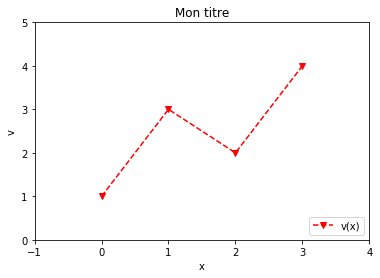

In [4]:
v = np.array([1, 3, 2, 4])
x = np.array([0, 1, 2, 3])

fig = plt.figure()
plt.plot(x,v, 'rv--', label='v(x)')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Mon titre')
plt.xlim([-1, 4])
plt.ylim([0, 5])
plt.show()
# fig.savefig('toto.svg')  # décommenter pour sauvegarder

**Remarque**: on peut omettre la commande `plt.show()` lorsque la méthode `ion()` (pour  *Interaction ON*) a été appelée.
C'est le cas dans `spyder` et `pylab` (qu'on lance par exemple avec la commande `ipython --pylab` dans un terminal Linux).

Pour définir une matrice (= array de dimension 2 pour `numpy`):


In [5]:
# Matrice: l'argument est une liste emboitée
M = np.array([[1, 2], [3, 4]])
print(M)

[[1 2]
 [3 4]]


In [6]:
M[0, 0]

1

Les objets `v` et `M` sont tous deux du type `ndarray` (fournis par `numpy`)

In [7]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

`v` et `M` ne diffèrent que par leur taille, que l'on peut obtenir via la propriété `shape` :

In [8]:
v.shape  # noter qu'ici un vecteur a une dimension vide pour sa deuxième

(4,)

In [9]:
M.shape

(2, 2)

Pour obtenir le nombre d'éléments d'un *array* :

In [10]:
v.size

4

In [11]:
M.size

4

On peut aussi utiliser `numpy.shape` et `numpy.size`

In [12]:
np.shape(M)

(2, 2)

Les *arrays* ont un type qu'on obtient via `dtype`:

In [13]:
print(M)
print(M.dtype)

[[1 2]
 [3 4]]
int64


Les types doivent être respectés lors d'assignations à des *arrays*

In [14]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

### Attention !

In [17]:
a = np.array([1,2,3])
a[0] = 3.2
print(a)
a.dtype

[3 2 3]


dtype('int64')

In [18]:
a = np.array([1,2,3], dtype=np.int64)
b = np.array([2,2,3], dtype=np.int64)
b = b.astype(float)
print(a / b)

[0.5 1.  1. ]


On peut définir le type de manière explicite en utilisant le mot clé `dtype` en argument: 

In [19]:
M = np.array([[1, 2], [3, 4]], dtype=complex)
M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

 * Autres types possibles avec `dtype` : `int`, `float`, `complex`, `bool`, `object`, etc.

 * On peut aussi spécifier la précision en bits: `int64`, `int16`, `float128`, `complex128`.

### Utilisation de fonction de génération d'*arrays*

#### `arange`

In [20]:
# Création d'un interval simple
x = np.arange(0, 10, 2) # arguments: start, stop, step
x

array([0, 2, 4, 6, 8])

In [21]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### `linspace` and `logspace`

In [22]:
# Attention : la fin EST inclus avec linspace
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [23]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

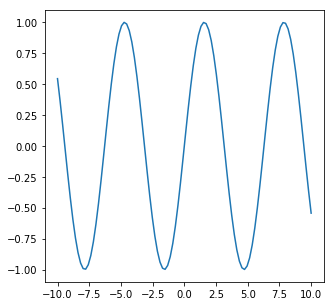

In [24]:
xx = np.linspace(-10, 10, 100)
fig = plt.figure(figsize=(5, 5))
plt.plot(xx, np.sin(xx))
plt.show()

In [25]:
print(np.logspace(0, 10, 10, base=np.e))

[1.00000000e+00 3.03773178e+00 9.22781435e+00 2.80316249e+01
 8.51525577e+01 2.58670631e+02 7.85771994e+02 2.38696456e+03
 7.25095809e+03 2.20264658e+04]


#### `mgrid`

In [26]:
x, y = np.mgrid[0:5, 0:5] 

In [27]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [28]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

<Figure size 432x288 with 0 Axes>

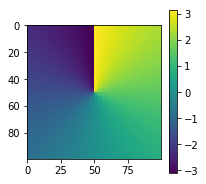

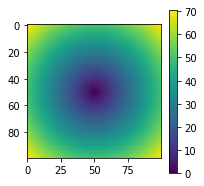

In [29]:
xx, yy = np.mgrid[-50:50, -50:50]
plt.figure()
plt.figure(figsize=(3, 3))
plt.imshow(np.angle(xx + 1j * yy))
plt.axis('on')
plt.colorbar()
plt.figure(figsize=(3, 3))
plt.imshow(np.abs(xx + 1j * yy))
plt.axis('on')
plt.colorbar()
plt.show()

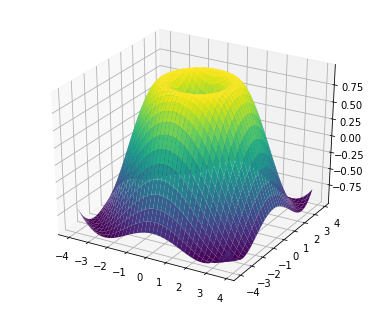

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 4))
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.2)
Y = np.arange(-4, 4, 0.2)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')


#### Génération de données aléatoires 

In [31]:
# tirage uniforme dans [0,1]
np.random.rand(5,5)  # ou np.random.rand

array([[0.14498478, 0.14114082, 0.82738386, 0.16113664, 0.3455601 ],
       [0.19381288, 0.65105383, 0.63881763, 0.0705923 , 0.31101085],
       [0.32276661, 0.14845865, 0.10877921, 0.16017728, 0.82394968],
       [0.76242885, 0.10283671, 0.40345025, 0.76170388, 0.81793412],
       [0.28680091, 0.63914603, 0.80484062, 0.78380647, 0.16740111]])

In [32]:
# tirage suivant une loi normale standard
np.random.randn(5,5)

array([[ 0.40286402,  1.71841154,  0.37908713,  0.3046238 ,  0.41633694],
       [ 0.35948277,  1.60624366,  0.11777106,  0.87148544,  0.44038452],
       [-0.57393465, -0.71140892, -0.39021318,  0.45374658, -1.88523632],
       [ 3.31619986,  1.1444625 , -0.19025331,  0.48517705, -1.2573565 ],
       [-1.1594982 , -1.52177655, -1.0140549 ,  1.92885922,  1.35553186]])

### Graine: 
Il est utile dans certains contexte de fixer la 'graine' du générateur aléatoire.
https://fr.wikipedia.org/wiki/Graine_al%C3%A9atoire

In [33]:
np.random.rand(12)

array([0.61698835, 0.6116935 , 0.8643673 , 0.72377841, 0.42849641,
       0.43926231, 0.74800102, 0.64717972, 0.35158585, 0.09936223,
       0.17106171, 0.2164222 ])

Maintenant le résultat est toujours le même pour une même graine (en: *seed*) si on relance la cellule plusieurs fois:

In [34]:
np.random.seed(seed=33)
np.random.rand(12)

array([0.24851013, 0.44997542, 0.4109408 , 0.26029969, 0.87039569,
       0.18503993, 0.01966143, 0.95325203, 0.6804508 , 0.48658813,
       0.96502682, 0.39339874])

Affichage de l'histogramme des tirages

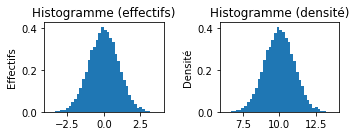

In [35]:
a = np.random.randn(10000)
plt.figure(figsize=(5,2))
plt.subplot(1, 2, 1)
plt.hist(a, bins=40, density=True)
plt.title('Histogramme (effectifs)')
plt.ylabel('Effectifs')

plt.subplot(1, 2, 2)

plt.hist(a + 10, bins=40, density=True)
plt.title('Histogramme (densité)')
plt.ylabel('Densité')

plt.tight_layout() # évite certains chevauchement de noms d'axes

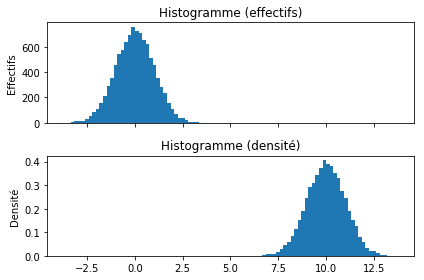

In [36]:
fig, axes = plt.subplots(2, 1, sharex='col')

axes[0].hist(a, bins=40, density=False)
axes[0].set_ylabel('Effectifs')
axes[0].set_title('Histogramme (effectifs)')

axes[1].hist(a + 10, bins=40, density=True)
axes[1].set_ylabel('Densité')
axes[1].set_title('Histogramme (densité)')

plt.tight_layout()

#### `diag`

In [37]:
# une matrice diagonale
A = np.diag([1,2,3])
A [1,2] = 17
A
np.diag(A)

array([1, 2, 3])

In [38]:
# une matrice diagonale avec décalage par rapport à la diagonale principale
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [39]:
# np.diag?
my_diag = np.array([0,0,0])
print(my_diag.shape)
print(M.shape)
np.diag(my_diag)
np.fill_diagonal(M,my_diag)
M

(3,)
(2, 2)


array([[0.+0.j, 2.+0.j],
       [3.+0.j, 0.+0.j]])

#### `diag`

Cette fonction permet (aussi!) d'extraire la diagonale ou une sous-diagonale d'un *array* :

In [40]:
print(A)
print(np.diag(A))

[[ 1  0  0]
 [ 0  2 17]
 [ 0  0  3]]
[1 2 3]


In [41]:
np.diag(A, -1)

array([0, 0])

#### `zeros`, `ones` et  `full`

In [42]:
np.zeros((3,), dtype=int)  # attention zeros(3,3) est FAUX

array([0, 0, 0])

In [43]:
zero_mat_float = np.zeros((3,4,6))

print(zero_mat_float.dtype)
print(np.zeros((3,), dtype=int).dtype)
zero_mat_float.shape

float64
int64


(3, 4, 6)

In [44]:
np.ones((3,)).shape

(3,)

In [45]:
print(np.zeros((3,), dtype=int))
print(np.zeros((1, 3), dtype=int))
print(np.zeros((3, 1), dtype=int))

[0 0 0]
[[0 0 0]]
[[0]
 [0]
 [0]]


In [46]:
np.full((5,4), 9)

array([[9, 9, 9, 9],
       [9, 9, 9, 9],
       [9, 9, 9, 9],
       [9, 9, 9, 9],
       [9, 9, 9, 9]])

##  Fichiers d'Entrées/Sorties (E/S)

### Fichiers séparés par des virgules (CSV)

Un format fichier classique est le format CSV (Comma-Separated Values).
Pour lire de tels fichiers on peut utiliser `numpy.genfromtxt`, mais on utilisera surtout le module `pandas` par la suite pour cela.

A l'aide de `numpy.savetxt` on peut enregistrer un *array* `numpy` dans un fichier txt:

In [50]:
M = np.random.rand(3,3)
print(M)
np.savetxt("random-matrix.txt", M)  # regader dans votre dossier, un nouveau fichier est apparu

[[0.12843094 0.92549805 0.2476814 ]
 [0.36774804 0.80627121 0.55177599]
 [0.78544591 0.93278414 0.93175008]]


In [51]:
MM = np.genfromtxt('random-matrix.txt') # on peut alors générer un array depuis un fichier texte
print(MM)

[[0.12843094 0.92549805 0.2476814 ]
 [0.36774804 0.80627121 0.55177599]
 [0.78544591 0.93278414 0.93175008]]


### Format de fichier `numpy` natif (`.npy`)

Pour sauvegarder et recharger des *array* `numpy` : `numpy.save` et `numpy.load` :

In [52]:
np.save("random-matrix.npy", M)
!cat random-matrix.npy

�NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (3, 3), }                                                          
�(�lp�?������?@��0��?*	�/��?c�I���?�Z&��?�Gx_"�?ojX^��?Z�(����?

In [53]:
N = np.load("random-matrix.npy")
N

array([[0.12843094, 0.92549805, 0.2476814 ],
       [0.36774804, 0.80627121, 0.55177599],
       [0.78544591, 0.93278414, 0.93175008]])

## Autres propriétés des *arrays* `numpy`

In [54]:
M

array([[0.12843094, 0.92549805, 0.2476814 ],
       [0.36774804, 0.80627121, 0.55177599],
       [0.78544591, 0.93278414, 0.93175008]])

In [55]:
M.dtype

dtype('float64')

In [56]:
M.itemsize # octets par élément

8

In [57]:
M.nbytes # nombre d'octets
np.save("random-matrix.npy", M)

In [58]:
M.nbytes / M.size

8.0

In [59]:
M.ndim # nombre de dimensions

2

In [60]:
print(np.zeros((3,), dtype=int).ndim)
print(np.zeros((1, 3), dtype=int).ndim)
print(np.zeros((3, 1), dtype=int).ndim)

1
2
2


## Manipulation d'*arrays*

### Indexation

In [61]:
# v est un vecteur, il n'a qu'une seule dimension -> un seul indice
v[3]


4

In [62]:
# M est une matrice, ou un array à 2 dimensions -> deux indices 
M[1,1]

0.8062712122968886

Contenu complet :

In [63]:
M

array([[0.12843094, 0.92549805, 0.2476814 ],
       [0.36774804, 0.80627121, 0.55177599],
       [0.78544591, 0.93278414, 0.93175008]])

La deuxième ligne :

In [64]:
M[1]

array([0.36774804, 0.80627121, 0.55177599])

On peut aussi utiliser `:` 

In [65]:
M[1,:].shape # 2 ème ligne (indice 1)

(3,)

In [66]:
M[:,1] # 2 ème colonne (indice 1)

array([0.92549805, 0.80627121, 0.93278414])

In [67]:
print(M.shape)
print(M[1,:].shape, M[:,1].shape)

(3, 3)
(3,) (3,)


On peut assigner des nouvelles valeurs à certaines cellules :

In [68]:
M[0,0] = 1

In [69]:
M

array([[1.        , 0.92549805, 0.2476814 ],
       [0.36774804, 0.80627121, 0.55177599],
       [0.78544591, 0.93278414, 0.93175008]])

In [70]:
# on peut aussi assigner des lignes ou des colonnes
M[1,:] = -1
M

array([[ 1.        ,  0.92549805,  0.2476814 ],
       [-1.        , -1.        , -1.        ],
       [ 0.78544591,  0.93278414,  0.93175008]])

In [71]:
M[1,:] = [1, 2, 3]
M

array([[1.        , 0.92549805, 0.2476814 ],
       [1.        , 2.        , 3.        ],
       [0.78544591, 0.93278414, 0.93175008]])

## *Slicing* ou accès par tranches

Le *Slicing* fait référence à la syntaxe `M[start:stop:step]` pour extraire une partie d'un *array* :

In [72]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [73]:
A[1:3]

array([2, 3])

Les tranches sont modifiables :

In [74]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

On peut omettre n'importe lequel des argument dans `M[start:stop:step]`:

In [75]:
A[::] # indices de début, fin, et pas avec leurs valeurs par défaut

array([ 1, -2, -3,  4,  5])

In [76]:
A[::2] # pas = 2, indices de début et de fin par défaut

array([ 1, -3,  5])

In [77]:
A[:3] # les trois premiers éléments

array([ 1, -2, -3])

In [78]:
A[3:] # à partir de l'indice 3

array([4, 5])

In [79]:
M = np.arange(12).reshape(4, 3)
print(M)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


On peut utiliser des indices négatifs :

In [80]:
A = np.array([1,2,3,4,5])

In [81]:
A[-1] # le dernier élément

5

In [82]:
A[-3:] # les 3 derniers éléments

array([3, 4, 5])

Le *slicing* fonctionne de façon similaire pour les *array* multi-dimensionnels

In [83]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [84]:
A[1:4, 1:4]  # sous-tableau

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [85]:
# sauts de deux en deux:
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [86]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [87]:
print(A[[0, 1, 3]])
print(A[[0, 1, 3],:])
print(A[:,[0, 1, 3]])


[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [30 31 32 33 34]]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [30 31 32 33 34]]
[[ 0  1  3]
 [10 11 13]
 [20 21 23]
 [30 31 33]
 [40 41 43]]


### Indexation avancée (*fancy indexing*)

Lorsque qu'on utilise des listes ou des *array* pour définir des tranches : 

In [88]:
row_indices = [1, 2, 3]
print(A)
print(A[row_indices])
print(A.shape)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]
(5, 5)


In [89]:
print(A[[1, 2], [3, 4]])

[13 24]


In [90]:
A[np.ix_([1, 2], [3, 4])] = 0
print(A)

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


On peut aussi utiliser des masques binaires :

In [91]:
B = np.arange(5)
B

array([0, 1, 2, 3, 4])

In [92]:
row_mask = np.array([True, False, True, False, False])
print(B[row_mask])
# print(B[[0,2]])

[0 2]


In [93]:
# ou de façon équivalente
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

In [94]:
# ou encore
a = np.array([1, 2, 3, 4, 5])
print(a < 3)
print(B[B > 3])
print(B)

[ True  True False False False]
[4]
[0 1 2 3 4]


In [95]:
print(A)
print(A[:, a < 3])

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 0  1]
 [10 11]
 [20 21]
 [30 31]
 [40 41]]


## Extraction de données à partir d'*arrays* et création d'*arrays*

#### `where`

Un masque binaire peut être converti en indices de positions avec `where`

In [96]:
x = np.arange(0, 10, 0.5)
print(x)
mask = (x > 5) * (x < 7.5)
print(mask)
indices = np.where(mask)
indices

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[False False False False False False False False False False False  True
  True  True  True False False False False False]


(array([11, 12, 13, 14]),)

In [97]:
print(x[indices]) # équivalent à x[mask]
print(x[mask])

[5.5 6.  6.5 7. ]
[5.5 6.  6.5 7. ]


## Algèbre linéaire

La performance des programmes écrit en `Python/numpy` dépend de la capacité à vectoriser les calculs (les écrire comme des opérations sur des vecteurs/matrices) en évitant au maximum les boucles `for/while`.

### Opérations scalaires

On peut effectuer les opérations arithmétiques habituelles pour multiplier, additionner, soustraire et diviser des *arrays* avec/par des scalaires :

In [98]:
v1 = np.arange(0, 5)
print(v1)

[0 1 2 3 4]


In [99]:
v1 * 2

array([0, 2, 4, 6, 8])

In [100]:
v1 + 2

array([2, 3, 4, 5, 6])

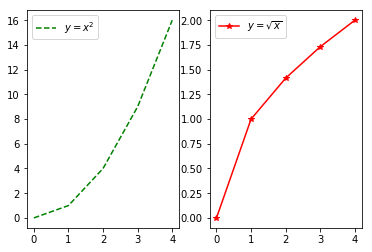

In [101]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(v1 ** 2,'g--', label='$y = x^2$')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(np.sqrt(v1), 'r*-', label='$y = \sqrt{x}$')
plt.legend(loc=2)
plt.show()

### Visualiser des matrices

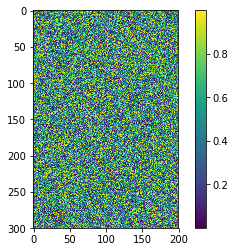

In [102]:
C = np.random.rand(300,200)
plt.figure()
plt.imshow(C)
plt.colorbar()
plt.show()

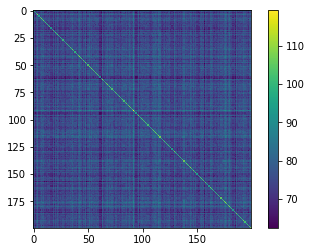

In [103]:
n_samples = 300
C = np.random.rand(n_samples,200)
plt.figure()

D = np.dot(C.T,C) # mulitplication de C^T avec C : = C^T C
D = C.T@C # idem mulitplication de C^T avec C : = C^T C
D = C.T.dot(C) # idem mulitplication de C^T avec C : = C^T C

plt.imshow(D)
plt.colorbar()
plt.show()

### Opérations terme-à-terme sur les *arrays*

Les opérations par défaut sont des opérations **terme-à-terme** (contrairement à Matlab par exemple).

In [104]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [105]:
A * A # multiplication terme-à-terme

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [106]:
S1=(A + A.T) / 2 # la projection de A sur les matrices symétriques

In [107]:
A1=(A - A.T) / 2 # la projection de A sur les matrices anti-symétriques
print(A1)

[[  0.   -4.5  -9.  -13.5 -18. ]
 [  4.5   0.   -4.5  -9.  -13.5]
 [  9.    4.5   0.   -4.5  -9. ]
 [ 13.5   9.    4.5   0.   -4.5]
 [ 18.   13.5   9.    4.5   0. ]]


In [108]:
print(A1+S1) # donne A
np.trace(S1.dot(A1)) # A1 et S1 sont orthogonaux pour le pdt scalaire 
#tr(S1^T A1)

[[ 0.  1.  2.  3.  4.]
 [10. 11. 12. 13. 14.]
 [20. 21. 22. 23. 24.]
 [30. 31. 32. 33. 34.]
 [40. 41. 42. 43. 44.]]


0.0

In [109]:
print(v1)
print(v1 * v1)

[0 1 2 3 4]
[ 0  1  4  9 16]


En multipliant des *arrays* de tailles compatibles, on obtient des multiplications terme-à-terme par ligne :

In [110]:
A.shape, v1.size

((5, 5), 5)

In [111]:
print(A)
print(v1)
print(A * v1)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[0 1 2 3 4]
[[  0   1   4   9  16]
 [  0  11  24  39  56]
 [  0  21  44  69  96]
 [  0  31  64  99 136]
 [  0  41  84 129 176]]


<font color='red'> EXERCICE : Sans utiliser de boucles (`for/while`), </font>


 * <font color='red'> Créer une matrice (5x6) aléatoire</font>
 * <font color='red'> Remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante</font>
 * <font color='red'> Remplacer les valeurs négatives par 0 en utilisant un masque binaire</font>


In [112]:
# XXX todo

### Algèbre matricielle

Comment faire des multiplications de matrices ? Deux façons :
 
 * en utilisant les fonctions `dot`; 
 * en utilisant le type `@/matmul` (pour les versions récentes de `numpy`).


In [113]:
print(A.shape)
print(A)
print(type(A))

(5, 5)
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
<class 'numpy.ndarray'>


In [114]:
print(np.dot(A, A))  # multiplication matrice
print(A.dot(A))  # multiplication matrice

print(A * A)  # multiplication élément par élément

[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]
[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]
[[   0    1    4    9   16]
 [ 100  121  144  169  196]
 [ 400  441  484  529  576]
 [ 900  961 1024 1089 1156]
 [1600 1681 1764 1849 1936]]


In [115]:
A.dot(v1)

array([ 30, 130, 230, 330, 430])

In [116]:
np.dot(v1, v1)

30

Voir également les fonctions : `inner`, `outer`, `cross`, `kron`, `tensordot`. Utiliser par exemple `help(kron)`.

### Transformations d'*arrays* ou de matrices

 * Plus haut `.T` a été utilisé pour transposer `v`
 * On peut aussi utiliser la fonction `transpose`

**Autres transformations :**

In [117]:
C = np.array([[1j, 2j], [3j, 4j]])
C

array([[0.+1.j, 0.+2.j],
       [0.+3.j, 0.+4.j]])

In [118]:
np.conj(C)  # conjuguée complexe

array([[0.-1.j, 0.-2.j],
       [0.-3.j, 0.-4.j]])

Transposée conjuguée :

In [119]:
C.conj().T

array([[0.-1.j, 0.-3.j],
       [0.-2.j, 0.-4.j]])

Parties réelles et imaginaires :

In [120]:
np.real(C) # équivalent à C.real

array([[0., 0.],
       [0., 0.]])

In [121]:
np.imag(C) # équivalent à C.imag

array([[1., 2.],
       [3., 4.]])

Argument et module :

In [122]:
np.angle(C+1) 

array([[0.78539816, 1.10714872],
       [1.24904577, 1.32581766]])

In [123]:
np.abs(C)

array([[1., 2.],
       [3., 4.]])

### Caclul matriciel

#### Analyse de données

`numpy` propose des fonctions pour calculer certaines statistiques des données stockées dans des *arrays* :

In [124]:
data = np.vander([1, 2, 3, 4], increasing=True)  # Matrice de Vandermonde
print(data)

[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]


#### `moyenne`

In [125]:
print(np.mean(data))
print(np.mean(data, axis=0))
print(np.mean(data, axis=1))

9.0
[ 1.   2.5  7.5 25. ]
[ 1.    3.75 10.   21.25]


In [126]:
# la moyenne de la troisième colonne
np.mean(data[:,2])

7.5

#### variance et écart type

In [127]:
print(np.var(data[:, 2]), np.std(data[:, 2]))

32.25 5.678908345800274


In [128]:
# ddof : Delta Degrees of Freedom
print(np.var(data[:, 2], ddof=1), np.std(data[:, 2], ddof=1))

43.0 6.557438524302


#### min et max

In [129]:
data[:,2].min()

1

In [130]:
data[:,2].max()

16

In [131]:
data[:,2].sum()

30

In [132]:
data[:,2].prod()

576

#### `sum`, `prod`, et `trace`

In [133]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [134]:
# somme des éléments
np.sum(d)

45

ou encore :

In [135]:
d.sum()

45

In [136]:
# produit des éléments
np.prod(d+1)

3628800

In [137]:
# somme cumulée
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [138]:
# produit cumulé
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [139]:
# équivalent à diag(A).sum()
np.trace(data)

76

### <font color='red'> EXERCICE :  Calculer une approximation de $\pi$ par la formule de Wallis sans boucle `for`, mais avec `numpy` </font>

\begin{align}
    \text{Formule de Wallis:}\quad \pi&= 2 \cdot \prod_{n=1}^{\infty }\left({\frac{4 n^{2}}{4 n^{2} - 1}}\right)
\end{align}

### Calculs aves données multi-dimensionnelles

Pour appliquer `min`, `max`, etc., par lignes ou colonnes :

In [143]:
m = np.random.rand(3,4)
m

array([[0.040838  , 0.26612153, 0.59285434, 0.99844582],
       [0.61175635, 0.08105323, 0.77368077, 0.58192975],
       [0.50214389, 0.56967244, 0.67712325, 0.31594004]])

In [144]:
# max global 
m.max()

0.998445815857398

In [145]:
# max dans chaque colonne
m.max(axis=0)

array([0.61175635, 0.56967244, 0.77368077, 0.99844582])

In [146]:
# max dans chaque ligne
m.max(axis=1)

array([0.99844582, 0.77368077, 0.67712325])

Plusieurs autres méthodes des classes `array` et `matrix` acceptent l'argument (optional) `axis` keyword argument.

## Copy et "deep copy"

Pour des raisons de performance `Python` ne copie pas automatiquement les objets (par exemple passage par référence des paramètres de fonctions).

In [147]:
A = np.array([[0,  2],[ 3,  4]])
A

array([[0, 2],
       [3, 4]])

In [148]:
B = A

In [149]:
# ATTENTION: changer B affecte A
B[0,0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [150]:
A

array([[10,  2],
       [ 3,  4]])

In [151]:
B = A
print(B is A)

True


Pour éviter ce comportement, on peut demander une *copie profonde* (en: *deep copy*) de `A` dans `B`

In [152]:
B = A.copy()  # identique à B = np.copy(A)

In [153]:
# maintenant en modifiant B, A n'est plus affecté
B[0,0] = -5
B

array([[-5,  2],
       [ 3,  4]])

In [154]:
A  # A n'est pas modifié cette fois!

array([[10,  2],
       [ 3,  4]])

### <font color='red'> EXERCICE :  interpréter ce qui se passe dans l'exemple ci-dessous </font>


In [155]:
print(A - A[:,0])  # FAUX
print(A - A[:,0].reshape((2, 1)))  # OK

[[ 0 -1]
 [-7  1]]
[[ 0 -8]
 [ 0  1]]


## Changement de forme et de taille, et concaténation des *arrays*



In [156]:
A

array([[10,  2],
       [ 3,  4]])

In [157]:
n, m = A.shape

In [158]:
B = A.reshape((1, n * m))
B

array([[10,  2,  3,  4]])

In [159]:
B[0, 0:5] = 5  # modifier l'array
B

array([[5, 5, 5, 5]])

In [160]:
A

array([[5, 5],
       [5, 5]])

### Attention !

La variable originale est aussi modifiée ! B n'est qu'une nouvelle *vue* de A.

Pour transformer un *array* multi-dimmensionel en un vecteur. Mais cette fois-ci, une copie des données est créée :

In [161]:
A = np.array([[0,  2],[ 3,  4]])
B = A.flatten()
print(A,B)

[[0 2]
 [3 4]] [0 2 3 4]


In [162]:
B[0:5] = 10
B

array([10, 10, 10, 10])

In [163]:
A # A ne change pas car B est une copie de A

array([[0, 2],
       [3, 4]])

### Ajouter une nouvelle dimension avec `newaxis`

Par exemple pour convertir un vecteur en une matrice ligne ou colonne :

In [164]:
v = np.array([1,2,3])

In [165]:
np.shape(v)

(3,)

In [166]:
# créer une matrice à une colonne à partir du vectuer v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [167]:
v[:,np.newaxis].shape

(3, 1)

In [168]:
# créer une matrice à une ligne à partir du vectuer v
v[np.newaxis,:].shape

(1, 3)

### Concaténer, répéter des *arrays*

En utilisant les fonctions `repeat`, `tile`, `vstack`, `hstack`, et `concatenate`, on peut créer des vecteurs/matrices plus grandes à partir de vecteurs/matrices plus petites :


#### `repeat` et `tile`

In [169]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [170]:
# répéter chaque élément 3 fois
np.repeat(a, 3) # résultat 1-d

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [171]:
# on peut spécifier l'argument axis
np.repeat(a, 3, axis=1)

array([[1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4]])

Pour répéter la matrice, il faut utiliser `tile`

In [172]:
# répéter la matrice 3 fois
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

#### `concatenate`

In [173]:
b = np.array([[5, 6]])

In [174]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [175]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

#### `hstack` et `vstack`

In [176]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [177]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Itérer sur les éléments d'un *array*

 * Dans la mesure du possible, il faut éviter l'itération sur les éléments d'un *array* : c'est beaucoup plus lent que les opérations vectorisées
 * Mais il arrive que l'on n'ait pas le choix...

In [178]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [179]:
M = np.array([[1, 2], [3, 4]])

for row in M:
    print("row", row)
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


Pour obtenir les indices des éléments sur lesquels on itère (par exemple, pour pouvoir les modifier en même temps) on peut utiliser `enumerate` :

In [180]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [181]:
# chaque élément de M a maintenant été élevé au carré
M

array([[ 1,  4],
       [ 9, 16]])

## Utilisation d'*arrays* dans des conditions

Losqu'on s'intéresse à des conditions sur tout on une partie d'un *array*, on peut utiliser `any` ou `all` :

In [182]:
M

array([[ 1,  4],
       [ 9, 16]])

In [183]:
if (M > 5).any():
    print("Au moins un élément de M est plus grand que 5.")
else:
    print("Aucun élément de M n'est plus grand que 5.")

Au moins un élément de M est plus grand que 5.


In [184]:
if (M > 5).all():
    print("Tous les éléments de M sont plus grands que 5.")
else:
    print("Tous les éléments de M sont plus petits que 5.")

Tous les éléments de M sont plus petits que 5.


## *Type casting*

On peut créer une vue d'un autre type que l'original pour un *array*

In [185]:
M = np.array([[-1,2], [0,4]])
M.dtype

dtype('int64')

In [186]:
M2 = M.astype(float)
M2

array([[-1.,  2.],
       [ 0.,  4.]])

In [187]:
M2.dtype

dtype('float64')

In [188]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [False,  True]])

## Pour aller plus loin

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy-lectures.org/ - une bible pour les sujets avancés (e.g. matrice sparse)
* http://scipy.org/NumPy_for_Matlab_Users - Un guide pour les utilisateurs de MATLAB.